**HISTOGRAMA PUNTOS VISITANTE**


CUNEF, Colegio Universitario de Estudios Financieros


MDS - Extracción, Transformación y Carga - ETL


Marta Ruedas Burgos 



**Descripción de la tarea**

Vamos a empezar a trabajar con spark

Para ellos vamos a trabajar con la siguiente fuente de datos:

partidosLigaNBA Enlace

 

El objetivo es realizar un histograma con SPARK de la variable puntos de visitante.

Para ello es necesario que:

* Cargar los datos en un rdd como vimos en la última clase 

* Aplicar el método map con una función split en su interior para separar por comas

* Seleccionar el elemento del vector generado que hace referencia a los puntos visitantes y transformar a numérico

* Filtrar aquellos casos que no sean 

* Aplicar una función map que transforme cada número en uno de los intervalos del histograma (elegidos por vosotros mismos)

Nota: Todas las funciones map se pueden resumir en una.

* Método de agrupación para generar un vector formado por cada elemento asociado a cada intervalor

* Función map para hacer un len y sacar el histograma

 

Debéis subir el código, en .py o en .ipynb (sin los datos resultantes que si puede ocupar mucho).

El objetivo es aplicar map-reduce, veremos más adelante como se puede hacer de manera más sencilla con sql.

**HISTOGRAMA PUNTOS VISITANTES**

In [33]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

In [34]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [35]:
import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [36]:
data = sc.textFile('partidosLigaNBA.csv')

In [37]:
data.count() 

12908

In [38]:
header_data = data.take(1)[0] 
header_data

'Date:Start..ET.:Visitor.Neutral:PTS:Home.Neutral:PTS.1'

In [39]:
noheader_data = data.filter(lambda x: x != header_data) #:
noheader_data.take(5)

['Tue, Oct 30, 2007:"7:30 pm":Utah Jazz:117:Golden State Warriors:96',
 'Tue, Oct 30, 2007:"7:30 pm":Houston Rockets:95:Los Angeles Lakers:93',
 'Tue, Oct 30, 2007:"7:00 pm":Portland Trail Blazers:97:San Antonio Spurs:106',
 'Wed, Oct 31, 2007:"8:00 pm":Dallas Mavericks:92:Cleveland Cavaliers:74',
 'Wed, Oct 31, 2007:"8:30 pm":Seattle SuperSonics:103:Denver Nuggets:120']

In [40]:
noheader_data = data.filter(lambda x: x != header_data).map(lambda x: x.split(':')) 
noheader_data.take(5)

[['Tue, Oct 30, 2007',
  '"7',
  '30 pm"',
  'Utah Jazz',
  '117',
  'Golden State Warriors',
  '96'],
 ['Tue, Oct 30, 2007',
  '"7',
  '30 pm"',
  'Houston Rockets',
  '95',
  'Los Angeles Lakers',
  '93'],
 ['Tue, Oct 30, 2007',
  '"7',
  '00 pm"',
  'Portland Trail Blazers',
  '97',
  'San Antonio Spurs',
  '106'],
 ['Wed, Oct 31, 2007',
  '"8',
  '00 pm"',
  'Dallas Mavericks',
  '92',
  'Cleveland Cavaliers',
  '74'],
 ['Wed, Oct 31, 2007',
  '"8',
  '30 pm"',
  'Seattle SuperSonics',
  '103',
  'Denver Nuggets',
  '120']]

In [41]:
noheader_data = data.filter(lambda x: x != header_data).map(lambda x: x.split(':')[-1]) 
noheader_data.take(5) #tipo categórico entre comillas, hay que pasarlo a numérico

['96', '93', '106', '74', '120']

In [42]:
noheader_data = data.filter(lambda x: x != header_data).map(lambda x: x.split(':')[-1]).map(lambda x: int(x)) 
noheader_data.take(5) #numérico #quitamos playoffs

[96, 93, 106, 74, 120]

In [43]:
noheader_data = data.filter(lambda x: x != header_data).map(lambda x: x.split(':')[-1]).map(lambda x: int(x)) #para que se entienda

In [44]:
noheader_data = data.filter(lambda s: s != header_data).map(lambda s: s.split(':')[-1]).filter(lambda s_pvisit: s_pvisit.isdigit()).map(lambda i_pvisit: int(i_pvisit))

In [45]:
x = noheader_data.collect() # lista, conversión

In [46]:
x.sort()

In [47]:
# sacamos cuartiles para que luego en el histograma los dividamos en cuatro frecuencias. 
print(x[int(len(x)*.25)])
print(x[int(len(x)*.50)])
print(x[int(len(x)*.75)])

93
101
110


In [48]:
# función, en clase dijo que la hiciesemos
# ponemos nombre a cada valor dependiendo el numero que sea entra en un intervalo o otro
def intervalos(x):
    if x <= 101:
        if x <= 93:
            return ('Interval 1')
        else:
            return ('Interval 2')
    else:
        if x <= 110:
            return ('Interval 3')
        else:
            return ('Interval 4') 

In [49]:
noheader_data.map(lambda x: (intervalos(x),1)).reduceByKey(lambda y,z: y + z).collect() # cada intervalo junto con su frecuencia

[('Interval 3', 3464),
 ('Interval 4', 2976),
 ('Interval 2', 3196),
 ('Interval 1', 3261)]

In [50]:
# Histograma sin graficar, todo lo anterior

**HISTOGRAMA - GRÁFICO**

<BarContainer object of 4 artists>

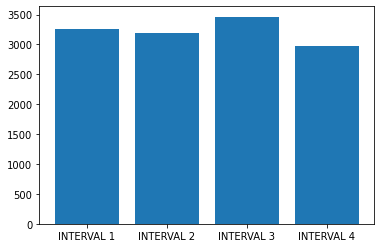

In [51]:
import matplotlib.pyplot as plt

a_dictionary = {"INTERVAL 1": 3261, "INTERVAL 2": 3196, "INTERVAL 3": 3464, 'INTERVAL 4': 2976}
keys = a_dictionary.keys()
values = a_dictionary.values()

plt.bar(keys, values) # FRECUENCIA DE LOS PUNTOS VISITANTES